## Constructing Models in Keras

### Introduction to Models

Two types of models available in Keras

![Models](Images/03_01.jpg) 

- Sequential Model
    - Easy to understand, can easily and quickly create a neural network
    - Define a sequential model and then add a sequence of layers
    - Connections between the layers are automatically made and managed


- Model Class with Functional API
    - Composed of arranged layers of functional units
    - User-defined layer connection between the units to create the best solution
    - More detailed neural network with enough power to solve complex problems
    
    
------



## Coding Complex Data

### deep_circles.py

Defines a network that can find separate circles of data

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

### Helper Functions

#### Plotting the Data on the Figure 

In [11]:
def plot_data(pl, X, y):
    
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    
    pl.legend(['0', '1'])
    
    return pl

#### Drawing Decision Boundaries

In [12]:
def plot_decision_boundary(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model
    c = model.predict(ab)
    
    # reshape the output so contourf can plot it
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    
    # plot the contour instead of just the line
    # allows us to see the confidence of the prediction
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt

### Generating Data Circles



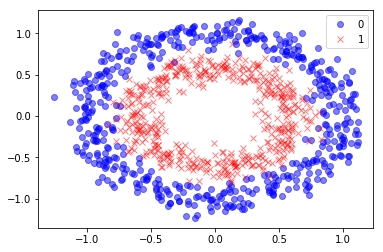

In [13]:
X, y = make_circles(n_samples=1000, factor=.6, \
                    noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

### Splitting Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating the Keras Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))


# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 430us/step - loss: 0.7249 - acc: 0.5086
Epoch 2/100
700/700 [==============================] - 0s 44us/step - loss: 0.6933 - acc: 0.5257
Epoch 3/100
700/700 [==============================] - 0s 47us/step - loss: 0.6943 - acc: 0.5114
Epoch 4/100
700/700 [==============================] - 0s 50us/step - loss: 0.6947 - acc: 0.4257
Epoch 5/100
700/700 [==============================] - 0s 46us/step - loss: 0.6941 - acc: 0.5486
Epoch 6/100
700/700 [==============================] - 0s 46us/step - loss: 0.6962 - acc: 0.4957
Epoch 7/100
700/700 [==============================] - 0s 48us/step - loss: 0.6967 - acc: 0.5643
Epoch 8/100
700/700 [==============================] - 0s 47us/step - loss: 0.6949 - acc: 0.4500
Epoch 9/100
700/700 [==============================] - 0s 49us/step - loss: 0.6955 - acc: 0.4729
Epoch 10/100
700/700 [==============================] - 0s 46us/step - loss: 0.6951 - acc: 0.5514
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 44us/step - loss: 0.6940 - acc: 0.5457
Epoch 85/100
700/700 [==============================] - 0s 43us/step - loss: 0.6944 - acc: 0.5129
Epoch 86/100
700/700 [==============================] - 0s 44us/step - loss: 0.6985 - acc: 0.5571
Epoch 87/100
700/700 [==============================] - 0s 47us/step - loss: 0.6983 - acc: 0.4614
Epoch 88/100
700/700 [==============================] - 0s 43us/step - loss: 0.6966 - acc: 0.5114
Epoch 89/100
700/700 [==============================] - 0s 43us/step - loss: 0.6949 - acc: 0.5157
Epoch 90/100
700/700 [==============================] - 0s 43us/step - loss: 0.6940 - acc: 0.4457
Epoch 91/100
700/700 [==============================] - 0s 41us/step - loss: 0.6974 - acc: 0.5529
Epoch 92/100
700/700 [==============================] - 0s 43us/step - loss: 0.6958 - acc: 0.4586
Epoch 93/100
700/700 [==============================] - 0s 46us/step - loss: 0.6962 - acc: 0.4829
Epoch 94/100
700/700 [===========

### Get Loss and Accuracy

In [17]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "\nTest accuracy:", eval_result[1])

300/300 [==============================] - 0s 107us/step


Test loss: 0.6984829036394755 
Test accuracy: 0.5800000007947286


### Plot the Decision Boundary

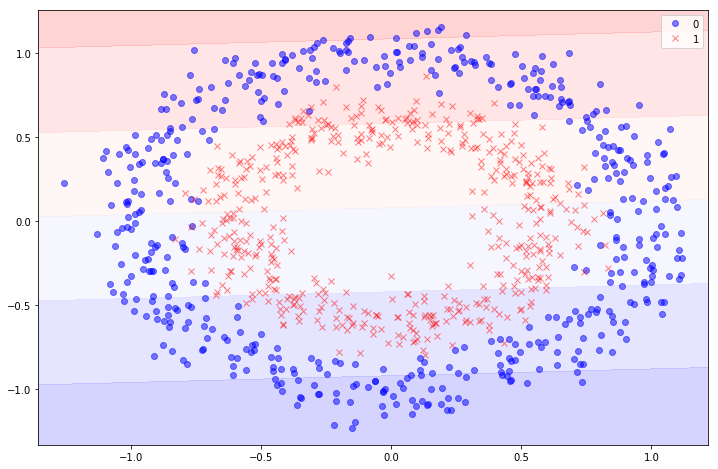

In [18]:
# Plot the decision boundary
plot_decision_boundary(model, X, y).show()

**This data is not linearly separable, so we have to use a different approach.** Fitting a plane through this data only leads to about 50% accuracy.

------

## Estimating Layers and Neurons

### Rules of Thumb for Starting Number of Hidden Layers

Unfortunately, there are no absolute rules since the best values are related to the data and how much training is done with the data.

[Guidelines](http://www.heatonresearch.com/2017/06/01/hidden-layers.html) come from Jeff Heaton



![Layers](Images/03_02.jpg) 

For our data, more than two layers is probably overkill.


-----


### Rules of Thumb for Starting Number of Neurons in Hidden Layers


![Neurons](Images/03_03.jpg) 